## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [2]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

51

In [3]:
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [4]:
parent_theme

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


##### Q1) What percentage of licensed licensed sets are Star Wars themed?

In [4]:
df.dropna(subset='set_num',axis=0,inplace=True)

Star_Wars = df[df["parent_theme"]=='Star Wars'].count()[0]
arr=parent_theme[parent_theme["is_licensed"]==True]["name"].to_list()
Total_Licenced = df[df["parent_theme"].isin(arr)].count()[0]

the_force=int(Star_Wars/Total_Licenced*100)
the_force

51

##### Q2) In what year was Star Wars not the most popular licensed lego set?

In [5]:
#merging the two datasets on the parent theme name
merged = df.merge(parent_theme,left_on="parent_theme",right_on="name")
merged.drop(columns='name_y',inplace=True)
merged.rename(columns={'name_x':'name'})

#Creating a new dataframe of all the licensed themes
licensed = merged[merged["is_licensed"]]
newdf = licensed.groupby(['year','parent_theme']).sum().reset_index()

newdf = newdf.sort_values('is_licensed',ascending=False)
newdf.drop_duplicates('year',inplace=True)
newdf.sort_values('year')

C:\Users\anady\AppData\Local\Temp\ipykernel_18200\4270687268.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf = licensed.groupby(['year','parent_theme']).sum().reset_index()


,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


##### Q3) What year had the maximum no of sales? Show by plotting a graph.

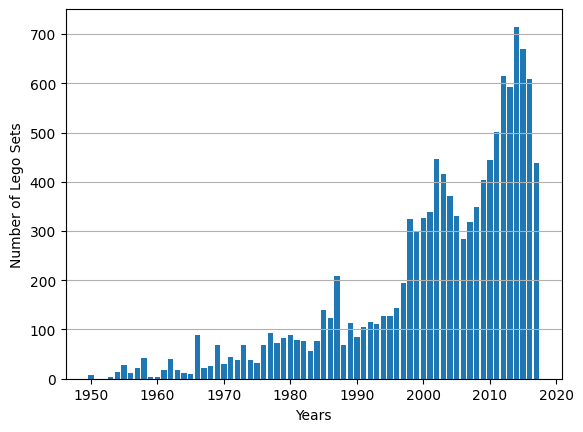

2014  had the maximum no of sets sold.


In [55]:
setsPerYear=merged.groupby('year').count().reset_index()[['year','is_licensed']]
setsPerYear
import matplotlib.pyplot as plt
grp=plt.bar(setsPerYear['year'],setsPerYear['is_licensed'])
plt.style='ggplot'
plt.grid(True,axis='y')
plt.xlabel('Years')
plt.ylabel('Number of Lego Sets')
plt.show()
year = setsPerYear[setsPerYear['is_licensed']==setsPerYear['is_licensed'].max()]["year"].item()
print(year ,' had the maximum no of sets sold.')